In [25]:
import matplotlib.pyplot as plt
%run data.ipynb

C:\Users\jackl\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: `item` has been deprecated and will be removed in a future version
C:\Users\jackl\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: `item` has been deprecated and will be removed in a future version


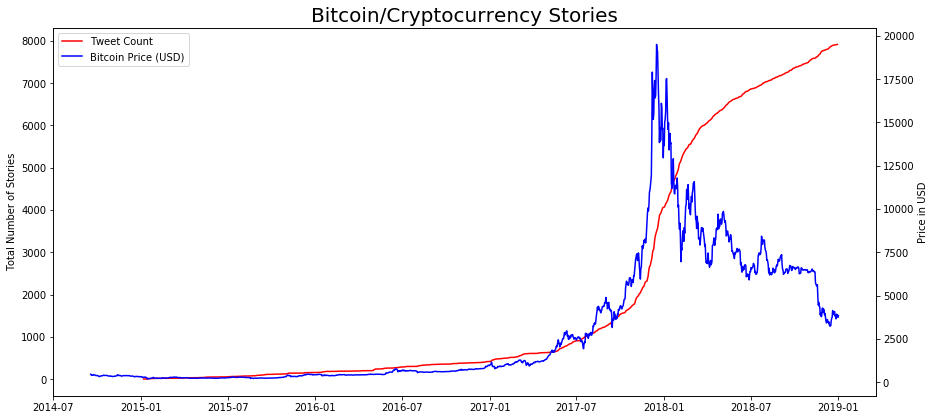

In [14]:
#graph 1
fig, ax1 = plt.subplots()
fig.tight_layout()
fig.set_size_inches(13, 6, forward=True)

lns1 = ax1.plot(get_num_stories_df(fdata_twitter), color='r', label='Tweet Count')
ax1.set_title("Bitcoin/Cryptocurrency Stories", size = 20) 
ax1.set_ylabel('Total Number of Stories')
ax1.set_xlabel("")


ax2 = ax1.twinx() 
lns2 = ax2.plot(btc_price, color='b', label="Bitcoin Price (USD)")
ax2.set_ylabel('Price in USD')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

plt.show()

C:\Users\jackl\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: `item` has been deprecated and will be removed in a future version
C:\Users\jackl\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: `item` has been deprecated and will be removed in a future version
C:\Users\jackl\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: FutureWarning: `item` has been deprecated and will be removed in a future version
C:\Users\jackl\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: FutureWarning: `item` has been deprecated and will be removed in a future version


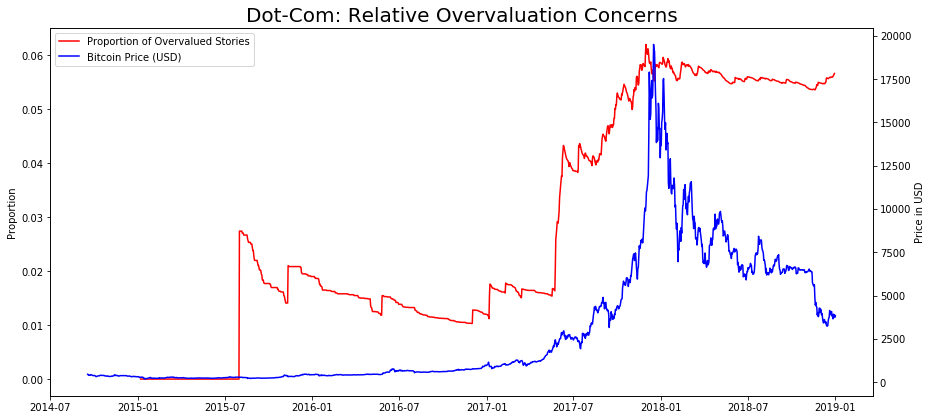

In [15]:
#graph 2
start_date = pd.to_datetime('2017-01-01')

overval_terms = ['bubble', 'overval', "too high",'crash', 'collapse', 'mania', 'burst', 
                 'sky-high', 'lost its senses', 'strange', 'bizarre', 'psychology', 'implode', 
                 'black hole', 'unwarrant', 'irrational', 'tulip', 'euphori',
                 'short sell', 'bandwagon', 'dot-com', 'dot com']

overval_df = get_subset_df(overval_terms, fdata_twitter)
df = get_prop_df(overval_df, fdata_twitter)

fig, ax1 = plt.subplots()
fig.tight_layout()
fig.set_size_inches(13, 6, forward=True)

lns1 = ax1.plot(df, color='r', label='Proportion of Overvalued Stories')
ax1.set_title("Crypto: Relative Overvaluation Concerns", size = 20) 
ax1.set_ylabel("Proportion")
ax1.set_xlabel("")

ax2 = ax1.twinx() 
lns2 = ax2.plot(btc_price, color='b', label="Bitcoin Price (USD)")
ax2.set_ylabel('Price in USD')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

plt.show()

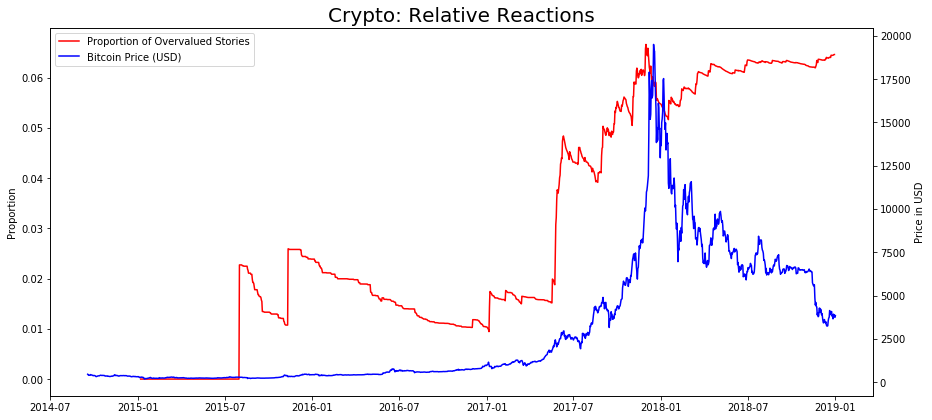

In [29]:
#graph 3
overval_df = get_subset_df(overval_terms, fdata_twitter)
df = get_prop_df_reactions(overval_df, fdata_twitter)

fig, ax1 = plt.subplots()
fig.tight_layout()
fig.set_size_inches(13, 6, forward=True)

lns1 = ax1.plot(df, color='r', label='Proportion of Overvalued Stories')
ax1.set_title("Crypto: Relative Reactions", size = 20) 
ax1.set_ylabel("Proportion")
ax1.set_xlabel("")

ax2 = ax1.twinx() 
lns2 = ax2.plot(btc_price, color='b', label="Bitcoin Price (USD)")
ax2.set_ylabel('Price in USD')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

plt.show()

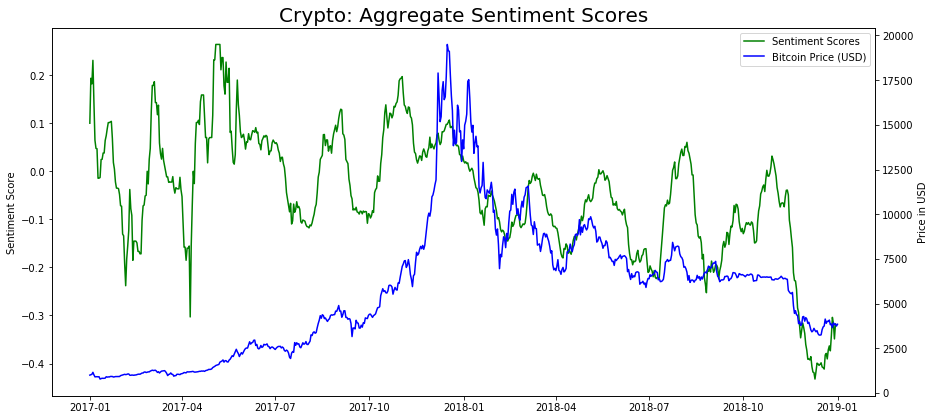

In [16]:
#graph 3
start_date = pd.to_datetime('2017-01-01')

fig, ax1 = plt.subplots()
fig.tight_layout()
fig.set_size_inches(13, 6, forward=True)

lns1 = ax1.plot(get_rolling_av_df(30, fdata_twitter)[start_date:], color='g', label='Sentiment Scores')
ax1.set_title("Crypto: Aggregate Sentiment Scores", size = 20) 
ax1.set_ylabel('Sentiment Score')
ax1.set_xlabel("")

ax2 = ax1.twinx() 
lns2 = ax2.plot(btc_price[start_date:], color='b', label="Bitcoin Price (USD)")
ax2.set_ylabel('Price in USD')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

plt.show()

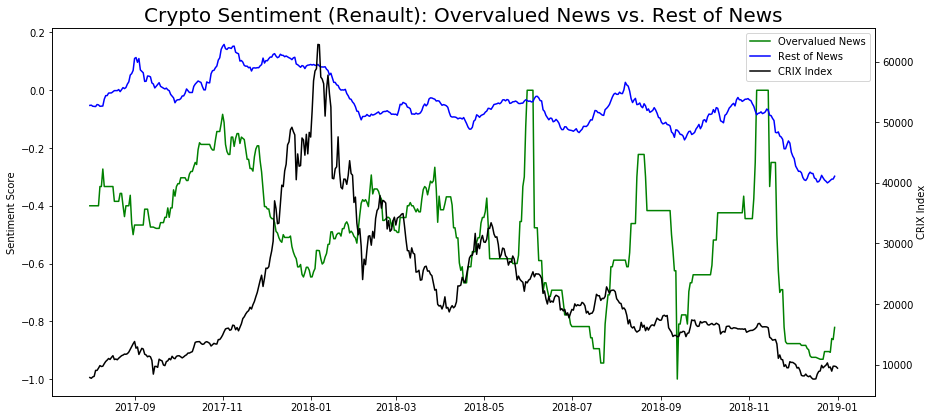

In [17]:
#graph 4
nonoverval_df = pd.concat([overval_df, fdata_twitter]).drop_duplicates(keep=False)
start_date = pd.to_datetime('2017-08-01')
end_date = pd.to_datetime('2019-01-01')

fig, ax1 = plt.subplots()
fig.tight_layout()
fig.set_size_inches(13, 6, forward=True)

lns1 = ax1.plot(get_rolling_av_df(45, overval_df)[start_date:], color='g', label='Overvalued News')
lns2 = ax1.plot(get_rolling_av_df(45, nonoverval_df)[start_date:], color='b', label='Rest of News')

ax1.set_title("Crypto Sentiment (Renault): Overvalued News vs. Rest of News", size = 20) 
ax1.set_ylabel('Sentiment Score')
ax1.set_xlabel("")

ax2 = ax1.twinx() 
lns3 = ax2.plot(crix_df['Close'][start_date:end_date], color='k', label="CRIX Index")
ax2.set_ylabel('CRIX Index')

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

plt.show()

In [18]:
#Welch t-test
from scipy import stats

In [19]:
print("Entire sample: ", stats.ttest_ind(overval_df['sent_score'], nonoverval_df['sent_score']))

Entire sample:  Ttest_indResult(statistic=-14.51994308371508, pvalue=3.6476389621167686e-47)


In [20]:
bubble_pop_date = pd.to_datetime('2018-01-01')
pre_bubble_overval = overval_df[overval_df['date'] < bubble_pop_date]
pre_bubble_nonoverval = nonoverval_df[nonoverval_df['date'] < bubble_pop_date]
print("Pre-burst sample: ", stats.ttest_ind(pre_bubble_overval['sent_score'], pre_bubble_nonoverval['sent_score']))

Pre-burst sample:  Ttest_indResult(statistic=-11.271510374634143, pvalue=4.875458913464176e-29)


In [21]:
nonoverval_df['sent_score'].mean()

-0.016258833435547567

In [22]:
overval_df['sent_score'].mean()

-0.47246984604450193

In [23]:
pre_bubble_overval['sent_score'].mean()

-0.42857106792749944

In [24]:
pre_bubble_nonoverval['sent_score'].mean()

0.05405989018489486